## 🌲 Random Forest Regressor
Random Forest Regressor builds multiple decision trees and averages their outputs to make accurate predictions for numerical targets.

### 🧑‍💼 Business Problem
A car resale company wants to predict the resale price of used cars based on mileage, age, brand value, horsepower, etc. Accurate predictions help in pricing strategy and profit optimization.
### ❓ Why Random Forest Regressor?
- Solves overfitting issues of Decision Trees.
- Works well with mixed-type features (numerical/categorical).
- Offers feature importance, helping in insights.
- Robust and handles missing/noisy data effectively.


In [1]:
# 1. Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# 2. Create Synthetic Car Resale Dataset
# Features: Mileage, Age, Horsepower, Brand_Value, Engine_Size
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

In [3]:
# Create a DataFrame for better understanding
columns = ['Mileage', 'Car_Age', 'Horsepower', 'Brand_Value', 'Engine_Size']
car_df = pd.DataFrame(X, columns=columns)
car_df['Resale_Price'] = y

In [4]:
car_df.head()

,Mileage,Car_Age,Horsepower,Brand_Value,Engine_Size,Resale_Price
0,0.560919,-0.370011,-0.295480,-0.258796,1.598647,-35.272910
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267,-142.632455
2,-2.650970,0.106430,1.091507,-0.254977,1.503993,-47.214021
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023,-126.521927
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334,-167.160591


In [5]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(car_df[columns], car_df['Resale_Price'], test_size=0.2, random_state=42)


In [6]:
# 4. Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# 5. Prediction
y_pred = rf.predict(X_test)

In [8]:
y_pred

array([-4.67094415e+01,  3.67028203e+01, -7.73231632e+00, -1.30520656e+02,
        3.18611646e+01,  3.85388265e+01, -4.61044794e+01,  1.12989888e+02,
        3.31806392e+00, -1.30108448e+02,  2.14210522e+02, -9.11316831e+00,
       -3.15620635e+01,  3.24684494e+01, -1.82527093e+02,  1.14415602e+02,
        2.36966636e+01,  8.29858295e+01, -1.90920461e+00, -4.89741433e+00,
        2.26444058e+01,  3.44708384e+01,  3.10467924e+01,  9.77303588e+01,
        6.70593090e+01,  7.90838043e+00, -4.29060593e+01,  5.88015773e+01,
       -9.30999150e+01, -2.07898203e+02,  4.14601319e+01, -2.71927367e+01,
       -5.01735234e+00, -2.36997206e+01, -1.54601204e+00,  1.47517492e+02,
        1.00047347e+02, -4.67348891e+01,  7.45929628e+01,  4.94086035e+01,
        2.15529335e+01,  5.53114829e+01,  7.92549361e+01,  6.41663550e+00,
        7.41370909e+00, -1.13906432e+02, -4.55719579e+01, -1.12540190e+02,
        1.01023063e+02, -1.53483080e+02,  2.70439063e+02, -8.72915308e+01,
        4.93978427e+01,  

In [9]:
# 6. Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 983.59
R2 Score: 0.9173


In [11]:
# 7. Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=columns).sort_values(ascending=False)

C:\Users\Dips\AppData\Local\Temp\ipykernel_21004\3900465630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


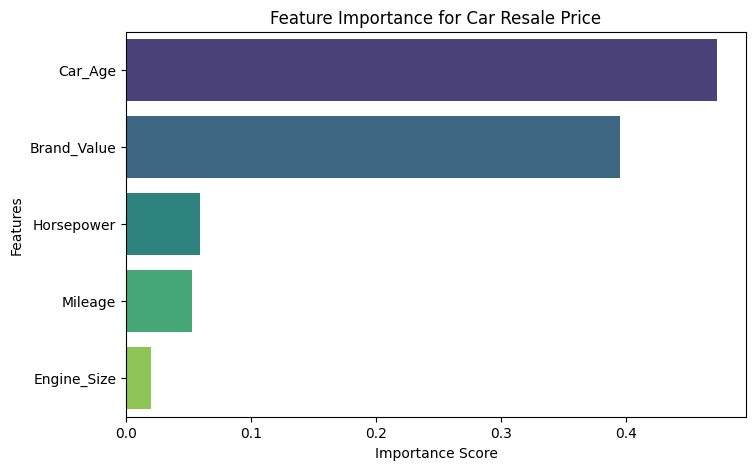

In [12]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance for Car Resale Price")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()